### Import libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Loading Dataset

In [16]:
diabetes_data = pd.read_csv('diabetes.csv')

In [17]:
# first 5 rows
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Checking missing values

<Axes: >

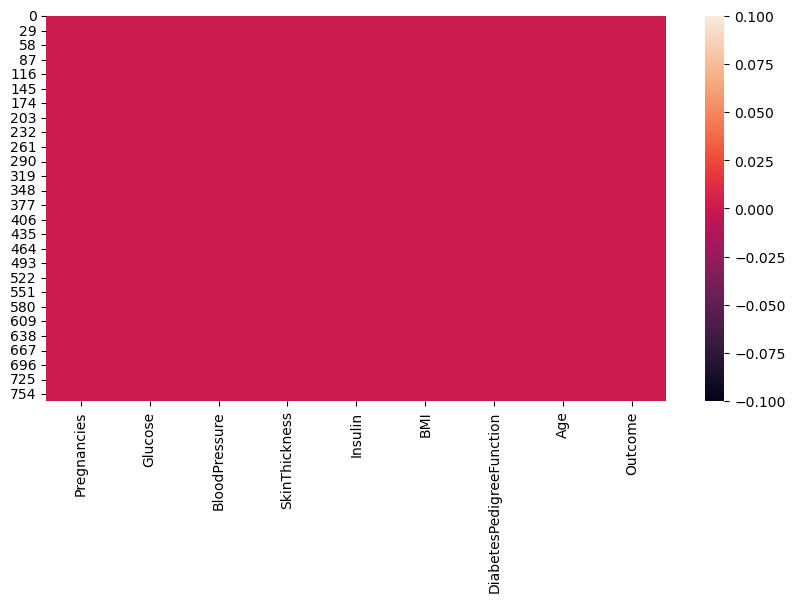

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(diabetes_data.isnull())

### Correlation matrix

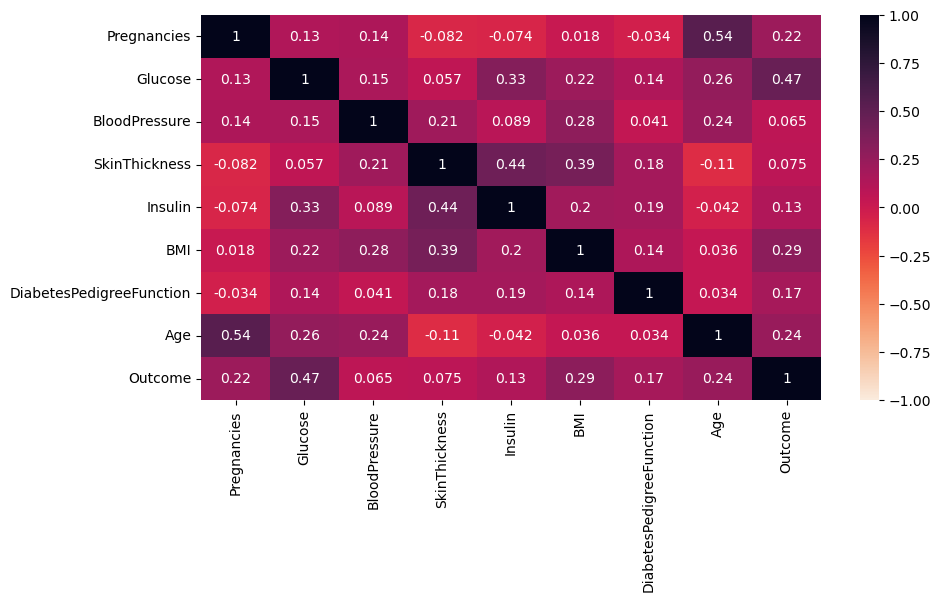

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(diabetes_data.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")
plt.show()

### Train Test Split & Standardization

In [20]:
x = diabetes_data.drop(columns='Outcome', axis=1)
y = diabetes_data['Outcome']

In [21]:
print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (768, 8)
Shape of y: (768,)


In [22]:
scaler = StandardScaler()

In [26]:
scaler.fit(x)

StandardScaler()

In [27]:
x = scaler.transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)

In [32]:
print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [33]:
print(y_train.shape, y_test.shape)

(614,) (154,)


### Building LogisticRegression model

In [34]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

### Prediction

In [35]:
y_pred = lg_model.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0]


### Evaluate

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.7207792207792207


In [43]:
def sysPredict(input_data):
    input_data = np.asarray(input_data)
    reshaped_data = input_data.reshape(1, -1)
    standard = scaler.transform(reshaped_data)
    
    y_pred = lg_model.predict(standard)
    
    if y_pred[0] == 0:
        return 'This patient does not have diabetes'
    else:
        return 'This patient has diabetes'

In [44]:
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
sysPredict(input_data)

E:\Anaconda\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient does not have diabetes'

In [45]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
sysPredict(input_data)

E:\Anaconda\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient has diabetes'

### Saving the training model

In [46]:
import pickle

In [48]:
filename = 'diabetes_model.sav'
pickle.dump(lg_model, open(filename, 'wb'))